<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Executing cells</h4>
    Evaluate individual cells by pressing Shift+Enter or Ctrl/Cmd+ Enter. You will note the difference between the two.
</div>

In [1]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

# Intro to Music21

Full documentation: http://web.mit.edu/music21/

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Hints for coding novices</h4>
    For those who don't have <i>any</i> background in coding, the green boxes have some general hints. 
</div>
<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading">Jupyter stunts</h4>
  Some might be new not to coding but to Jupyter notebooks, so the yellow boxes introduce some practical hints, mainly shortcuts.
</div>

## Configure Music21

The library uses your installation of MuseScore to display scores. Tell it where the MuseScore executable can be found on your computer by uncommenting and adapting the respective line.

In [2]:
# Windows (adapt Program Files)
#musescore_executable = r'C:\Program Files (x86)\MuseScore 3\bin\MuseScore3.exe'

# Mac path
#musescore_executable = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

# Linux path (if Package manager is not Snap)
musescore_executable = '/usr/bin/mscore'
# otherwise, download AppImage, e.g.
#musescore_executable = '~/Downloads/MuseScore-3.6.2.548021370-x86_64.AppImage'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Strings</h4>
    Strings are collections of characters, deliminated by 'string' "string" or """string""". In Jupyter, they are shown in red.
</div>

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Variables</h4>
    Variables are created by assigning values to them: new_variable = "value".
    Here, the value is a string but it can of course be of any data type.
</div>

## Data structure

The main musical object we will work with in music21 is note.Note. Each note.Note object, unsurprisingly, represents... one note!

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Classes and Objects</h4>
    Here, a Note object is created (initialized) by calling the corresponding class definition Note(). The object is said to be an instance of the class.
</div>

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Moving in an dout of cells</h4>
    Double click or press Enter to activate the cursor, press Escape to get out and navigate between cells.
</div>

In [3]:
n = note.Note()

There are four main containers (streams) of musical objects in music21: 
- stream.Measure, which is meant to contain a segment of music with no internal subdivision (e.g., no barlines)
- stream.Stream and stream.Part, which are meant to gather several adjacent measures (e.g., an individual instrument in a score) 
- stream.Score, which is meant to gather several simultaneous streams (e.g., the whole score)

The different types of stream can be organised hierarchically: a stream.Stream may contain two simultaneous stream.Parts, each comprising several adjacent stream.Measures. 

For example, let us have a look at this chorale by J. S. Bach, drawn from musci21 corpora:

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Parameters</h4>
In the following cell, an object is creating by passing the argument 'bwv66.6' which corresponds to passing a string value to a function. Some arguments are required; they are called positional because you can specify them without naming them by simply passing them in the order defined in the function definition: (pos_arg1, pos_arg2, pos_arg3). Arguments that are not required are called keyword arguments which always have to be named: (kwarg4=value, kwarg2=value). As you see, order does not matter. It is not forbidden to name positional arguments, too, so below we could write (workName='bwv66.6'). Try it out! 
</div>

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Learning parameters (=checking docstrings)</h4>
    Place your cursor between the parentheses and press TAB :-)
</div>

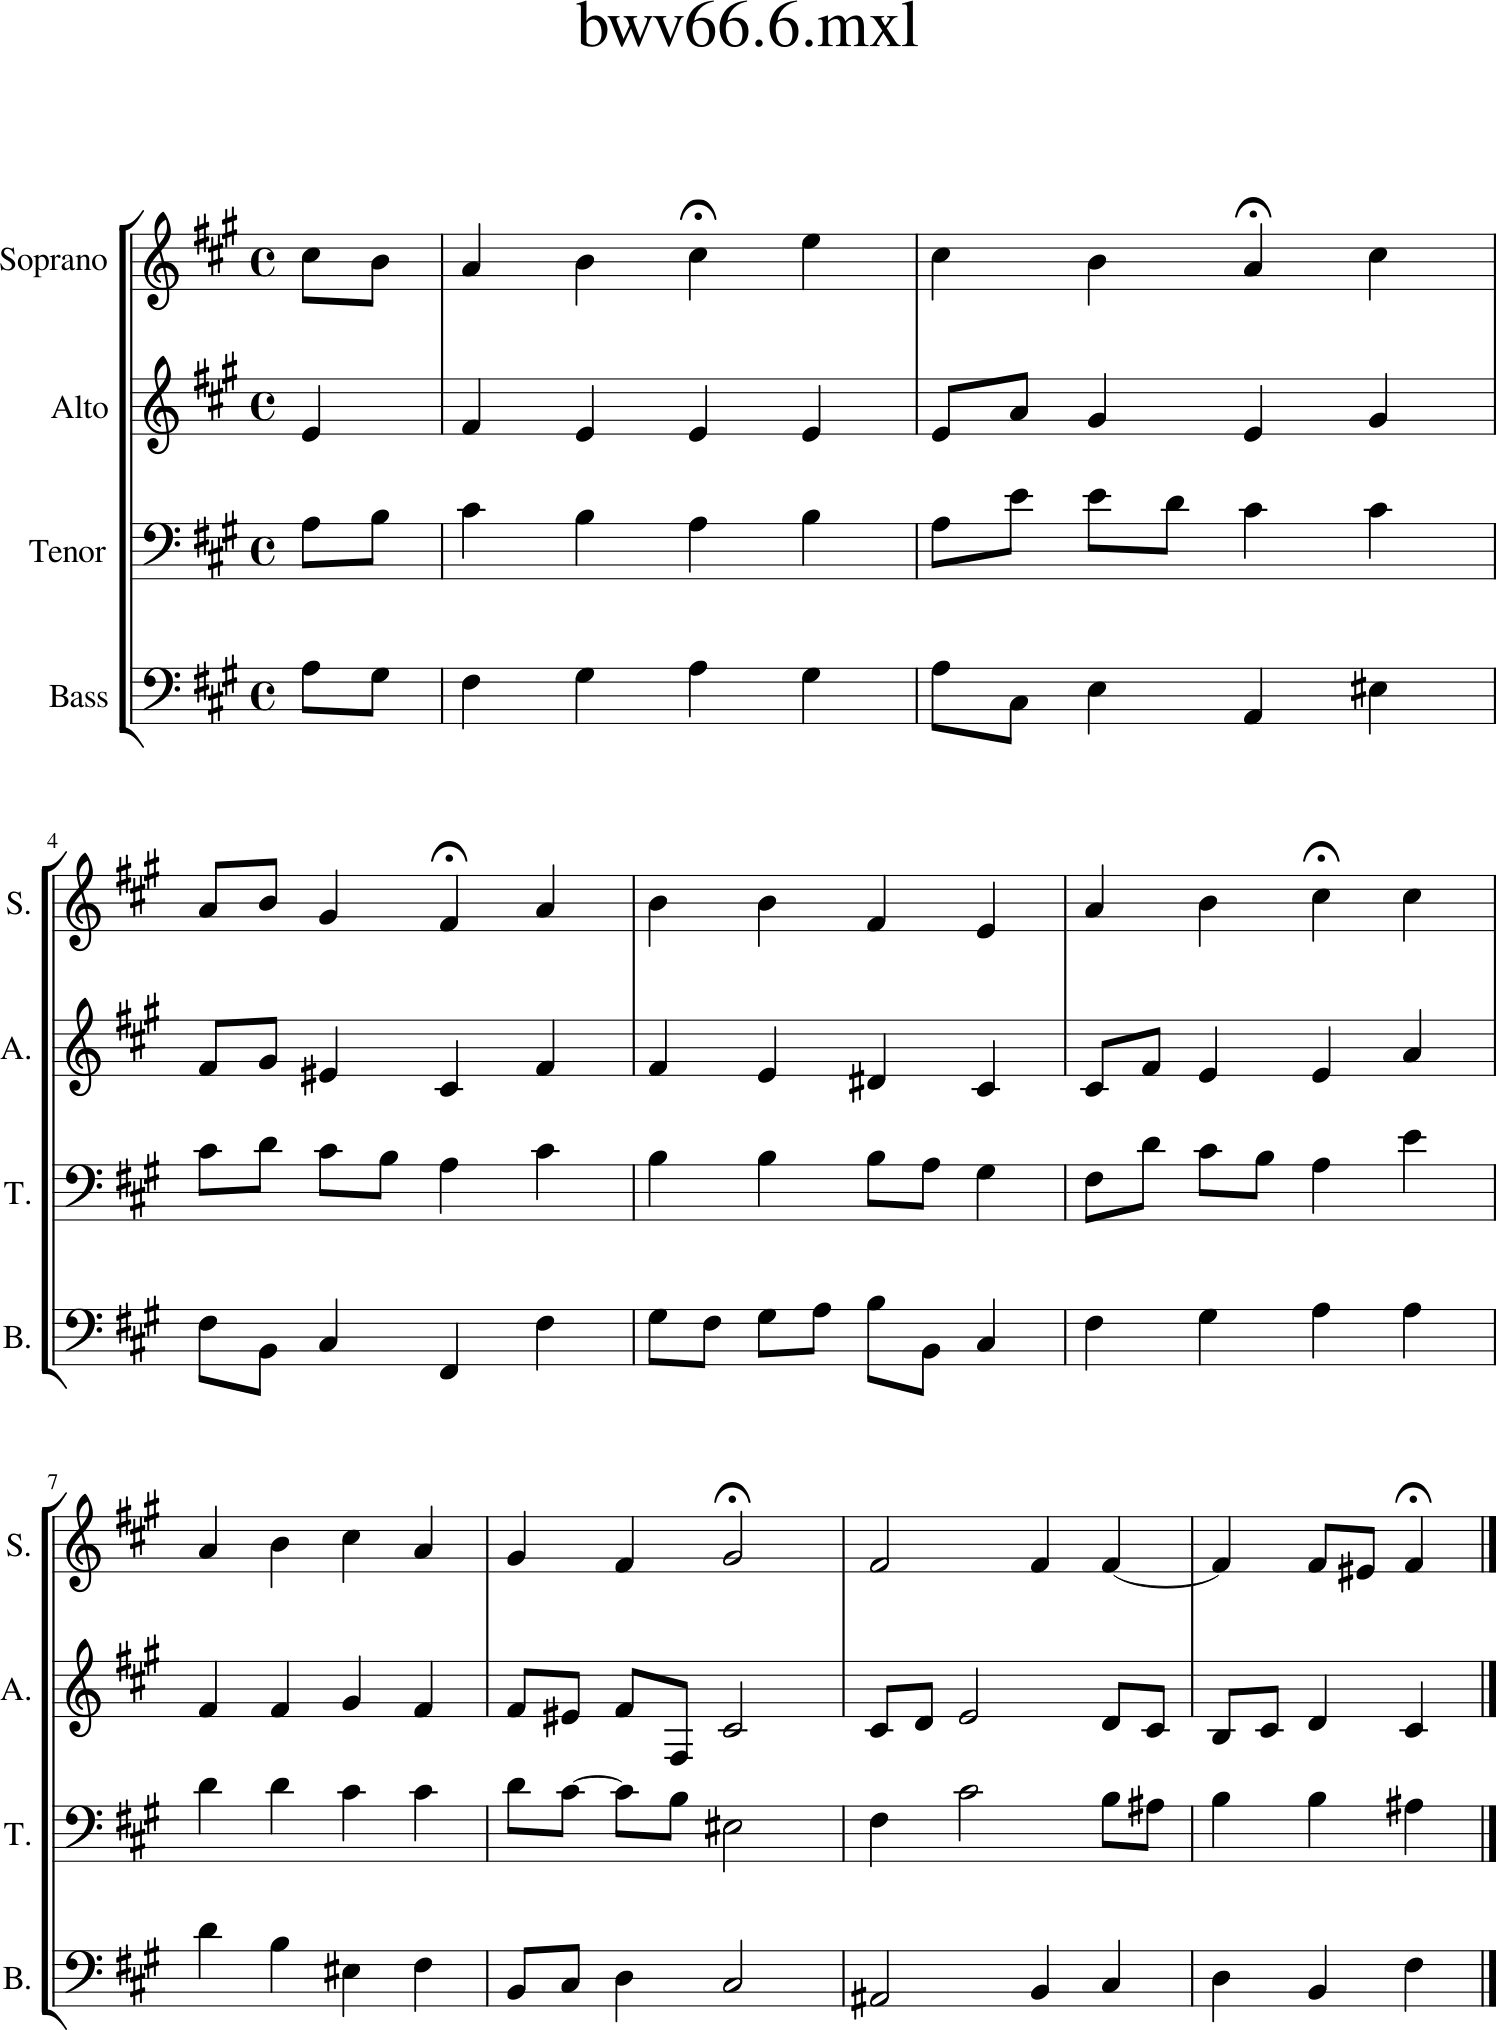

In [4]:
bach_chorale = corpus.parse('bwv66.6')
bach_chorale.show()

The bach_chorale variable now stores a stream.Score object:

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Inspecting</h4>
    By simply writing out a variably and evaluating the cell, Jupyter will somehow represent its value, mostly by converting it to a string. In the following case, it does not know how to represent the Score object, so it simply prints what time of object it is and a memory address.
</div>

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Adding new cells</h4>
    Press Esc to get out of the current cell. Then press a to insert a cell above or b to insert a cell below the current cell. Pressing d twice deletes the current cell. Pressing m converts the current cell into a text cell: In the dropdown menu above it says "Markdown" now rather than "Code".
</div>

In [5]:
bach_chorale

<music21.stream.Score 0x7f58c144a340>

and, if we look into the full data structure, we see how note.Note objects are embedded into stream.Measure objects, which are nested into stream.Part objects (one for Soprano, one for Alto, ecc), which collectively form the stream.Score: 

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Methods</h4>
    You can ask objects to perform an operation by calling on one of its methods, separated by a dot (similar to passing the object to a function).
</div>

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Inspect methods and properties</h4>
    In Jupyter, type an object and the following dot, then press Tab to see all methods and properties.
</div>

In [6]:
bach_chorale.show('text')

{0.0} <music21.metadata.Metadata object at 0x7f58c144a3a0>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of f# minor>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note C#>
        {0.5} <music21.note.Note B>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note C#>
        {3.0} <music21.note.Note E>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.note.Note C#>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note A>
        {3.0} <music21.note.Note C#>
    {9.0} <music21.stream.Measure 3 offset=9.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note B>
        {1.0} <music21.note.Not

Stream objects behave as iterators over their content:

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Lists</h4>
    A list is a collection of elements (of any type) that looks like this: [e1, e2, e3] To understand the following cell, check out "list comprehensions in python" (read or watch video).
</div>

In [7]:
[x for x in bach_chorale]

 <music21.stream.Part Soprano>,
 <music21.stream.Part Alto>,
 <music21.stream.Part Tenor>,
 <music21.stream.Part Bass>,
 <music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>]

We can flatten the hierarchy of the data structure, gathering all objects that are not containers of other objects in a single list:

In [8]:
[x for x in bach_chorale.flat]

 <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>,
 <music21.instrument.Instrument 'P2: Alto: Instrument 2'>,
 <music21.instrument.Instrument 'P3: Tenor: Instrument 3'>,
 <music21.instrument.Instrument 'P4: Bass: Instrument 4'>,
 <music21.clef.TrebleClef>,
 <music21.clef.TrebleClef>,
 <music21.clef.BassClef>,
 <music21.clef.BassClef>,
 <music21.key.Key of f# minor>,
 <music21.key.Key of f# minor>,
 <music21.key.Key of f# minor>,
 <music21.key.Key of f# minor>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.note.Note C#>,
 <music21.note.Note E>,
 <music21.note.Note A>,
 <music21.note.Note A>,
 <music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note F#>,
 <music21.note.Note C#

We can also selectively pick the note objects:

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">List comprehensions</h4>
    The following cell shows a list comprehension within a list comprehension, which outputs a list of lists.
</div>

In [9]:
[[note for note in voice.flat.notes] for voice in bach_chorale.parts]

[[<music21.note.Note C#>,
  <music21.note.Note B>,
  <music21.note.Note A>,
  <music21.note.Note B>,
  <music21.note.Note C#>,
  <music21.note.Note E>,
  <music21.note.Note C#>,
  <music21.note.Note B>,
  <music21.note.Note A>,
  <music21.note.Note C#>,
  <music21.note.Note A>,
  <music21.note.Note B>,
  <music21.note.Note G#>,
  <music21.note.Note F#>,
  <music21.note.Note A>,
  <music21.note.Note B>,
  <music21.note.Note B>,
  <music21.note.Note F#>,
  <music21.note.Note E>,
  <music21.note.Note A>,
  <music21.note.Note B>,
  <music21.note.Note C#>,
  <music21.note.Note C#>,
  <music21.note.Note A>,
  <music21.note.Note B>,
  <music21.note.Note C#>,
  <music21.note.Note A>,
  <music21.note.Note G#>,
  <music21.note.Note F#>,
  <music21.note.Note G#>,
  <music21.note.Note F#>,
  <music21.note.Note F#>,
  <music21.note.Note F#>,
  <music21.note.Note F#>,
  <music21.note.Note F#>,
  <music21.note.Note E#>,
  <music21.note.Note F#>],
 [<music21.note.Note E>,
  <music21.note.Note F#>,
  <

## Playback

In order to play the sound of note objects, let us embed them into a stream object:

In [10]:
m = stream.Measure() #create stream.Measure
m.append(n) #embed note in Measure

and then

In [11]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Function definitions</h4>
    The cell above shows one of the simplest function definitions possible: The new function play() is defined through the keyword def and a single positional argument, score, is defined. Once this cell is evaluated, every call to play() evaluates all indented lines beneath the first line (function calls always need parantheses, even if no arguments are passed). 'Indented' in Python means by four spaces or one tab, because 1 tab == 4 spaces
</div>

In [12]:
play(m)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Attributes of notes 

Each note has two main attributes: its pitch and its duration. 

By default, the pitch of note.Note is a "middle C", i.e., the C in the middle octave of a piano keyboard. Its duration, by default, is a quarter-note.

We can see it in score representation:

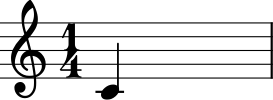

In [13]:
note.Note().show()

Clearly, it is possible to manipulate both the pitch and the duration of a note.Note object.

## Pitch

There are several ways to represent and refer to the pitch of a note.

#### Pitch class and octave
Western musicians typically refer to the twelve chromatic pitches by their name: C, C#\Db, D, D#\Eb, ...

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Append</h4>
Append is the very common operation of adding elements at the end of something. If you have a list called l, l.append('last') adds the string as l's last element (if it's a list, the list becomes the last element). Note that m, in the cell below, is not a list, but a Measure object.
</div>

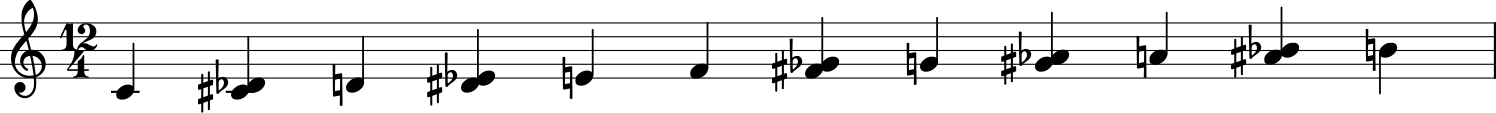

In [14]:
notes = [['C'], ['C#', 'Db'], ['D'], ['D#', 'Eb'], ['E'], ['F'], ['F#', 'Gb'], ['G'], ['G#','Ab'], ['A'], ['A#','Bb'], ['B']]
m = stream.Measure()
m.append([chord.Chord([note.Note(name) for name in pitch_class]) for pitch_class in notes])

m.show()

However, note that the name of a note is not sufficient to uniquely identify its pitch. In fact, we have one C, one C#\Db, etc. for each octave.

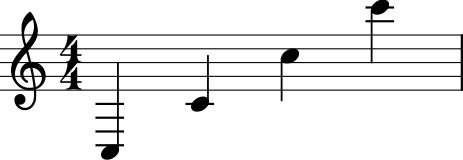

In [15]:
m = stream.Measure()
m.append([note.Note('C'+str(octave)) for octave in range(3,7)])
m.show()

As a consequence, we may identify the pitch of a note by specifying its name (or pitch class) and its octave. For example, the pitch class of the default Note object is

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Properties</h4>
Properties are 'values of an object', in the sense of variables attached to it. In most cases you can use them just like other variables, e.g. assign new values to them etc. Just like methods, properties are separated by a dot, the difference is that they are not followed by parenthesis for passing arguments.
</div>

In [16]:
note.Note().pitch.name

'C'

and its octave is

In [17]:
note.Note().pitch.octave

4

Let us now define a new Note object, corresponding to the C# right above the middle C:

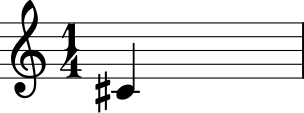

In [18]:
Csharp = note.Note(pitch = 'C#', octave = 4)
Csharp.show()

or

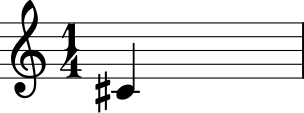

In [19]:
CsharpALT = note.Note(pitch = 'C#4')
CsharpALT.show()

In [20]:
#Are Csharp and CsharpALT the same note?
Csharp == CsharpALT

True

#### MIDI pitch
Alternatively, we may map each key of the piano keyboard onto an integer. This representation, the MIDI pitch, is conventionally defined so that "middle C" has value 60, and all other values are determined accordingly. As a consequence, the default MIDI pitch of a note.Note object is...

In [21]:
note.Note().pitch.midi

60

Let us now create a new note object representing a note with pitch class E, but one octave higher than middle C. Pitch class E is 4 halfsteps above pitch class C (C --> C# --> D --> D# -->E), and we further need to move one octave higher, which is 12 more halfsteps:

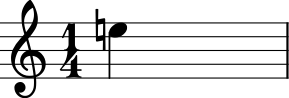

In [22]:
highE = note.Note(pitch = 60 + 4 + 12)
highE.show()

We can listen to both our Csharp and our highE, one after the other:

In [23]:
melodic_interval = stream.Measure()
melodic_interval.append([Csharp, highE])
play(melodic_interval)

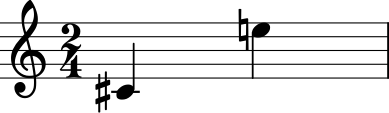

In [24]:
melodic_interval.show()

If we want to hear them simultaneously, we can create a chord object:

In [25]:
c = chord.Chord([Csharp, highE])
harmonic_interval = stream.Measure()
harmonic_interval.append(c)
play(harmonic_interval)

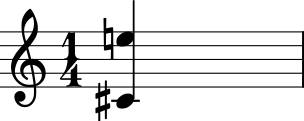

In [26]:
harmonic_interval.show()

#### Absolute frequency

While picking from the chromatic scale is the default for many genres in the Western historical tradition, this is by no means the only option (more on this in Week 4). In particular, we can also specify the pitch of a note by its absolute frequency in Hz:

In [27]:
n1 = note.Note(name = 'A4')

## Create a new note object and reassign its pitch in terms of an absolute frequency
n2 = note.Note()
n2.pitch.frequency = 450 #Hz

## Create a new note object and reassign its pitch in terms of an absolute frequency
n3 = note.Note()
n3.pitch.frequency = 460 #Hz

n4 = note.Note(name = 'A#4')

m = stream.Measure()
m.append([n1, n2, n3, n4])


play(m)

Note that, if you choose arbitrary frequencies that do not match any of the chromatic tones, the score is not an appropriate representation anymore. The score representation is tailored to encode Western (mainly tonal) music, and does not afford appropriate notation for micro-tonal pitches, i.e., pitches that fall in-between the twelve chromatic tones. If you try, you will get an approximation to the closest quarter-tone, which is as far as ordinary Western notation gets. In particular, observe how the last two tones are *notated* as being the same pitch, yet they *sound* different.

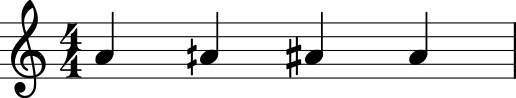

In [28]:
m.show()

#### Microtonal tuning

One way to work with microtonal pitches is to interpret them as deformations of the familiar chromatic pitches. For example, let us look again at J. S. Bach's chorale:

In [29]:
bach_chorale = corpus.parse('bwv66.6')
#play(bach_chorale)

We can imagine to play this chorale on a de-tuned keyboard. Specifically, let us de-tune each of the 128 "keys" of the midi-pitched keyboard by a random value comprised betweeen -50 and +50 cents (1 cent is 1/100 of a semitone): 

In [30]:
keyDetune = []
for i in range(127):
    keyDetune.append(random.randint(-50, 50))

Now, we apply the randomly determined mistuning to the original chorale, and play the result:

In [31]:
for n in bach_chorale.flat.notes:
    n.pitch.microtone = keyDetune[n.pitch.midi] #apply the microtonal tuning to each note in the piece

#play(bach_chorale)

However, considering microtonal pitches as deformation of chromatic pitches is just one option. Pitch-space is a continuous interval of positive real numbers, spanning the whole range of audible frequencies (~20Hz - ~20000Hz) and you can and should explore creative ways to filter and organise this space!

## Duration

In music21, durations are expressed relative to a "musical" measurement unit, which is the quarterLength, i.e., the duration of a quarter note. The quarter note is itself 1/4 of a whole note, and other typical duration values in Western notation can be obtained by dividing and multiplying by powers of 2.

From left to right, a 64th note, a 32th note, a 16th note, an eigth note, a quarter note, a half note, a whole note, and a brevis (2 x whole note) 

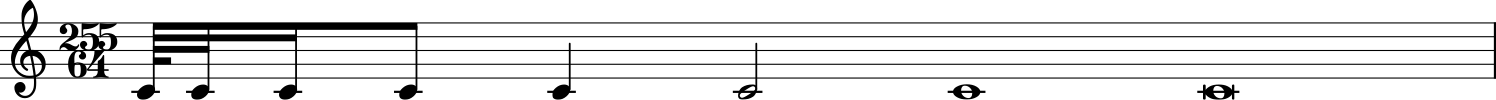

In [32]:
m = stream.Measure()
for i in range(-4, 4):
    m.append(note.Note(quarterLength = 2 ** i))
m.show()    

and the corresponding rests (i.e., silences)

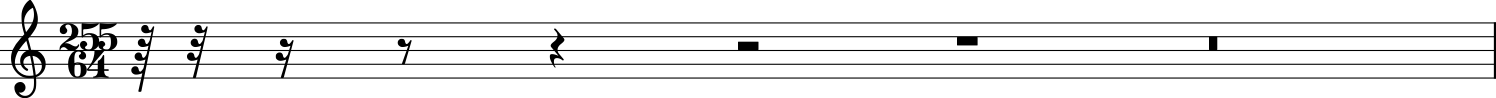

In [33]:
m = stream.Measure()
for i in range(-4, 4):
    m.append(note.Rest(quarterLength = 2 ** i))
m.show()  

It is also possible to have ternary (or n-ary) splits of these basic durations:

In [34]:
s = stream.Stream()

unit = 1 #unit to be split
mUnit = stream.Measure(0)
mUnit.append(note.Note(quarterLength = unit))


N = 3 #N-ary split
mTuplet = stream.Measure(1)
for i in range(N):
    mTuplet.append(note.Note(quarterLength = unit/N))

s.append([mUnit, mTuplet])

play(s)

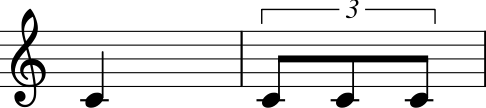

In [35]:
s.show()

In [36]:
mUnit.quarterLength == mTuplet.quarterLength

True

Clearly, it is also possible to assign completely arbitrary durations!

In [37]:
dur = [np.sqrt(5), np.pi, 11/13]

m = stream.Measure()
m.append([note.Note(quarterLength = x) for x in dur])

play(m)

Do not expect to be able to show this measure in score notation! (try, if you dare)

In [38]:
#m.show()

Nevertheless, you can still choose a piano-roll representation:

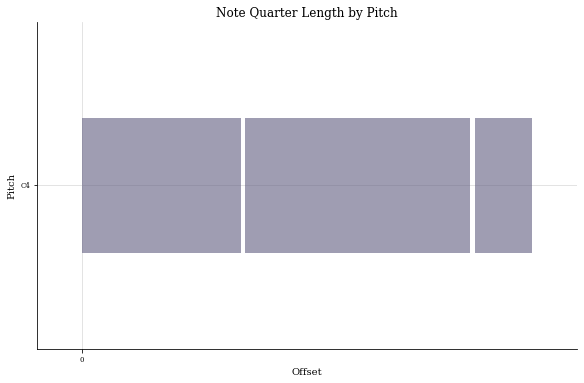

In [39]:
m.plot()

#### Tempo

To set the *actual* duration of a note, we also need to specify the **tempo** (the speed), which is expressed in beats (quarter-notes) per minute (bpm). The default tempo is 120bpm (i.e., two quarter notes per second). At 60bpm, the quarterLength unit corresponds to seconds.

In [40]:
m = stream.Measure()
m.append(tempo.MetronomeMark(number = 60)) #Set the tempo at 60bpm

for i in range(4): #                           
    m.append(note.Note(quarterLength = 1))
    
play(m)

#### Meter

In Western notation the duration of a measure, the meter, is typically specified at the outset. If you set the Time Signature in a stream.Stream() object, measure splits will be added automatically.

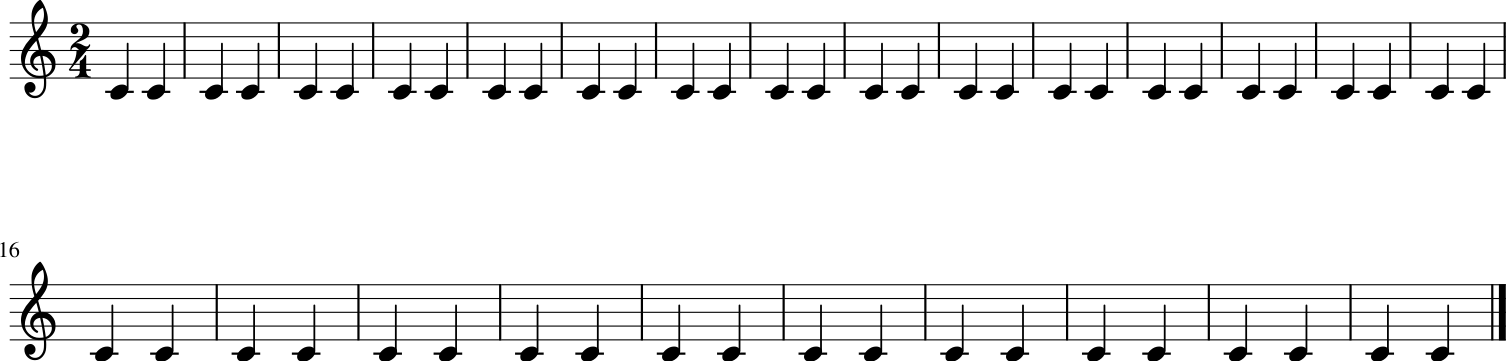

In [41]:
s = stream.Stream()
s.append(meter.TimeSignature('2/4'))

for i in range(50): #                           
    s.append(note.Note(quarterLength = 1))
    
s.show()

Otherwise, you can build a stream object by assembling several measures...

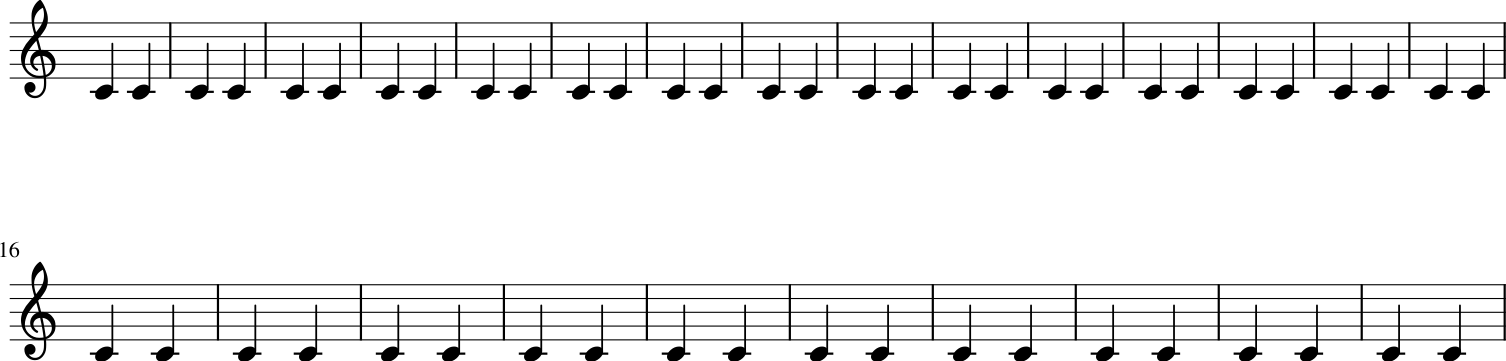

In [42]:
s = stream.Stream()

for i in range(25):
    m = stream.Measure(i)
    m.append([note.Note(), note.Note()])
    s.append(m)
    
s.show()

... not necessarily with the same meter:

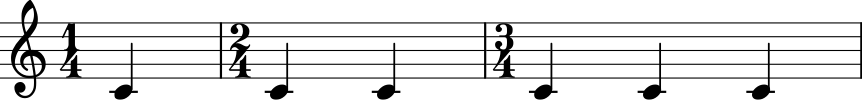

In [43]:
s = stream.Stream()

for i in range(1,4):
    m = stream.Measure(i)
    m.append(meter.TimeSignature(str(i)+'/4'))
    m.append([note.Note() for k in range(i)])
    s.append(m)
    
s.show()

#### Offset

The position of notes in time is quantified in terms of their distance from the beginning of the stream object they belong to, the **offset**. The offset is also measured in quarterLength units. 

Let us look again at the first couple of bars from the chorale:

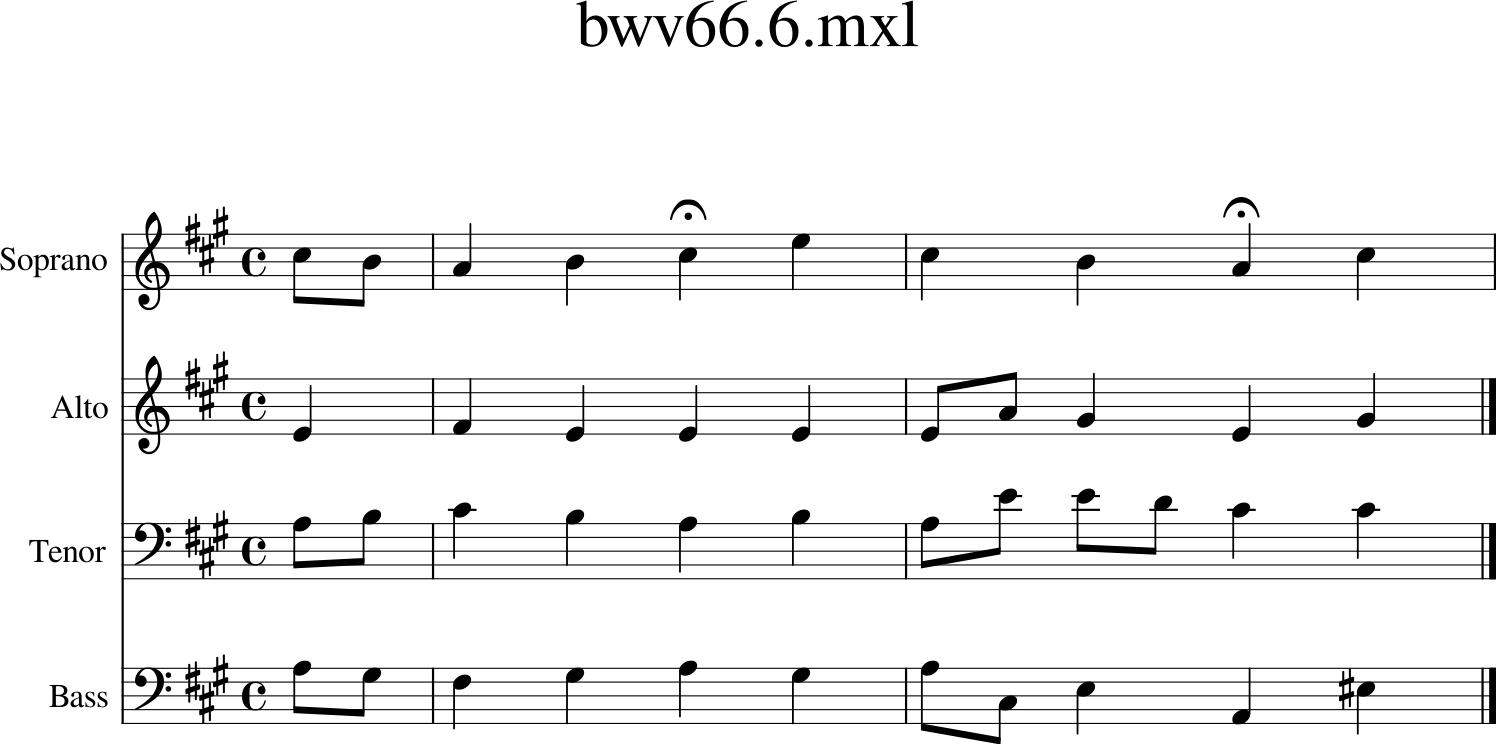

In [44]:
bach_chorale.measures(0, 2).show()

Let's select the second note of the first complete bar in the Soprano part. It starts after two quarter-notes from the beginning of the stream:

In [45]:
list(bach_chorale.parts[0].flat.getElementsByOffset(2, classList = [note.Note])) #the classList argument specifies what type of objects we want to extract. In this case, notes

[<music21.note.Note B>]

Now, let's extract all notes starting at the second eigth-note of the second complete bar (i.e., after 5.5 quarter-notes from the beginning of the stream):

In [46]:
list(bach_chorale.flat.getElementsByOffset(5.5, classList = [note.Note]))

[<music21.note.Note A>, <music21.note.Note E>, <music21.note.Note C#>]

The three eigth-notes in the Alto (A), Tenor (E) and Bass (C#) are the only notes that **start** at offset 5.5. However, note that che C# in the Soprano is also sounding at this moment in time. If we are interested in selecting all notes that are sounding at the given offset, rather than those that start at that offset, we do

In [47]:
list(bach_chorale.flat.getElementsByOffset(5.5, mustBeginInSpan = False,  classList = [note.Note]))

[<music21.note.Note C#>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note C#>]

We can use these tools to select specific notes and modify them. Let us change the last C# in the soprano into a D:

In [48]:
bach_chorale.parts[0].flat.getElementsByOffset(8, classList = [note.Note])[0].pitch.name = 'D5'

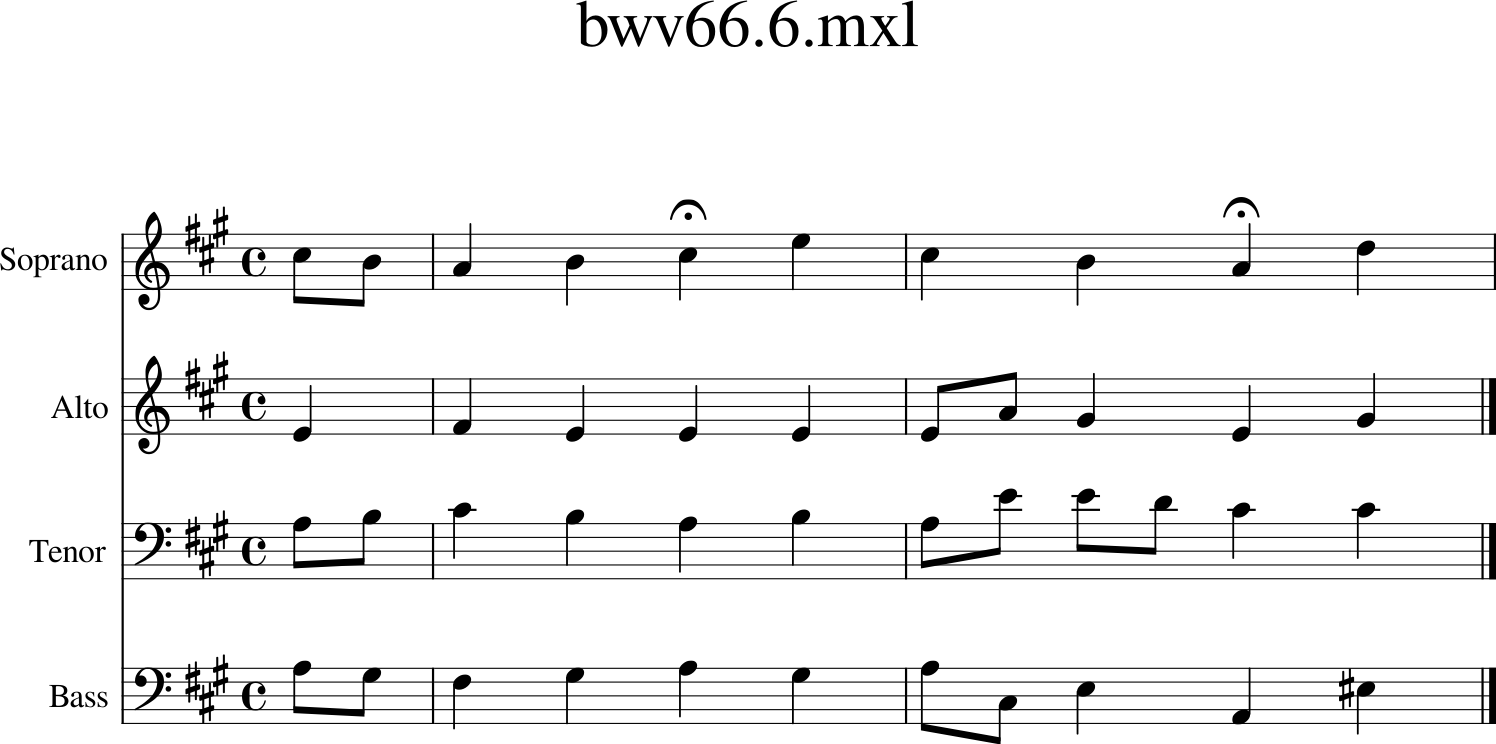

In [49]:
bach_chorale.measures(0, 2).show()

# An example

Pitch material is drawn from J. S. Bach's musical signature (Bb, A, C, B, or BACH in german notation). Bach himself used this motto in this fugue https://youtu.be/CpnfQntMisc?t=576 (the first 4 notes you hear!), where his unrivalled capacity to express creativity and affect within the well-defined (algorithmic?) mechanisms of a fugue is on display. 

Now, let's look at this code (which has nothing to do with Bach's fugue!). Can you figure out what is going on in this "piece"? What could the musical idea be? What determines when the piece ends? Is this really **one** piece?

In [50]:
BACH = ['Bb4', 'A4', 'C5', 'B4']
durations = [1.5, 1, 0.5, 0.5, 0.5] 

n_bars_per_group = 3

bpm = 220
timeSig = '4/4'

s = stream.Stream()
s.append(tempo.MetronomeMark(number = bpm))
s.append(meter.TimeSignature('4/4'))


measure_count = 0 
motto = BACH
while len(set(motto)) > 1 :
    for bar in range(n_bars_per_group):
        m = stream.Measure(measure_count)

        random.shuffle(durations)
    
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in durations]
        m.append(selected_notes)
    
        s.append(m)
        
        measure_count += 1
            
    motto = list(s[-n_bars_per_group:].flat.pitches)

durations = sorted(durations)[1:]
slower = 1.5
while len(durations) >= 1:
    m.append(tempo.MetronomeMark(number = bpm/slower))
    for bar in range(n_bars_per_group):
        
        total_duration = sum(durations)
        if int(total_duration) != total_duration:
            n_beats = str(int(2*total_duration))
            unit = '8'
        else:
            n_beats = str(int(total_duration))
            unit = '4'
            
        m = stream.Measure(measure_count)
        m.append(meter.TimeSignature(n_beats+'/'+unit))

        sample_durations = durations.copy()
        random.shuffle(sample_durations)
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in sample_durations]
        m.append(selected_notes)
    
        s.append(m)
        
        measure_count += 1
    
    durations = durations[1:]
    slower += 0.5

Here is the output in three different representations: score, audio, and piano roll.

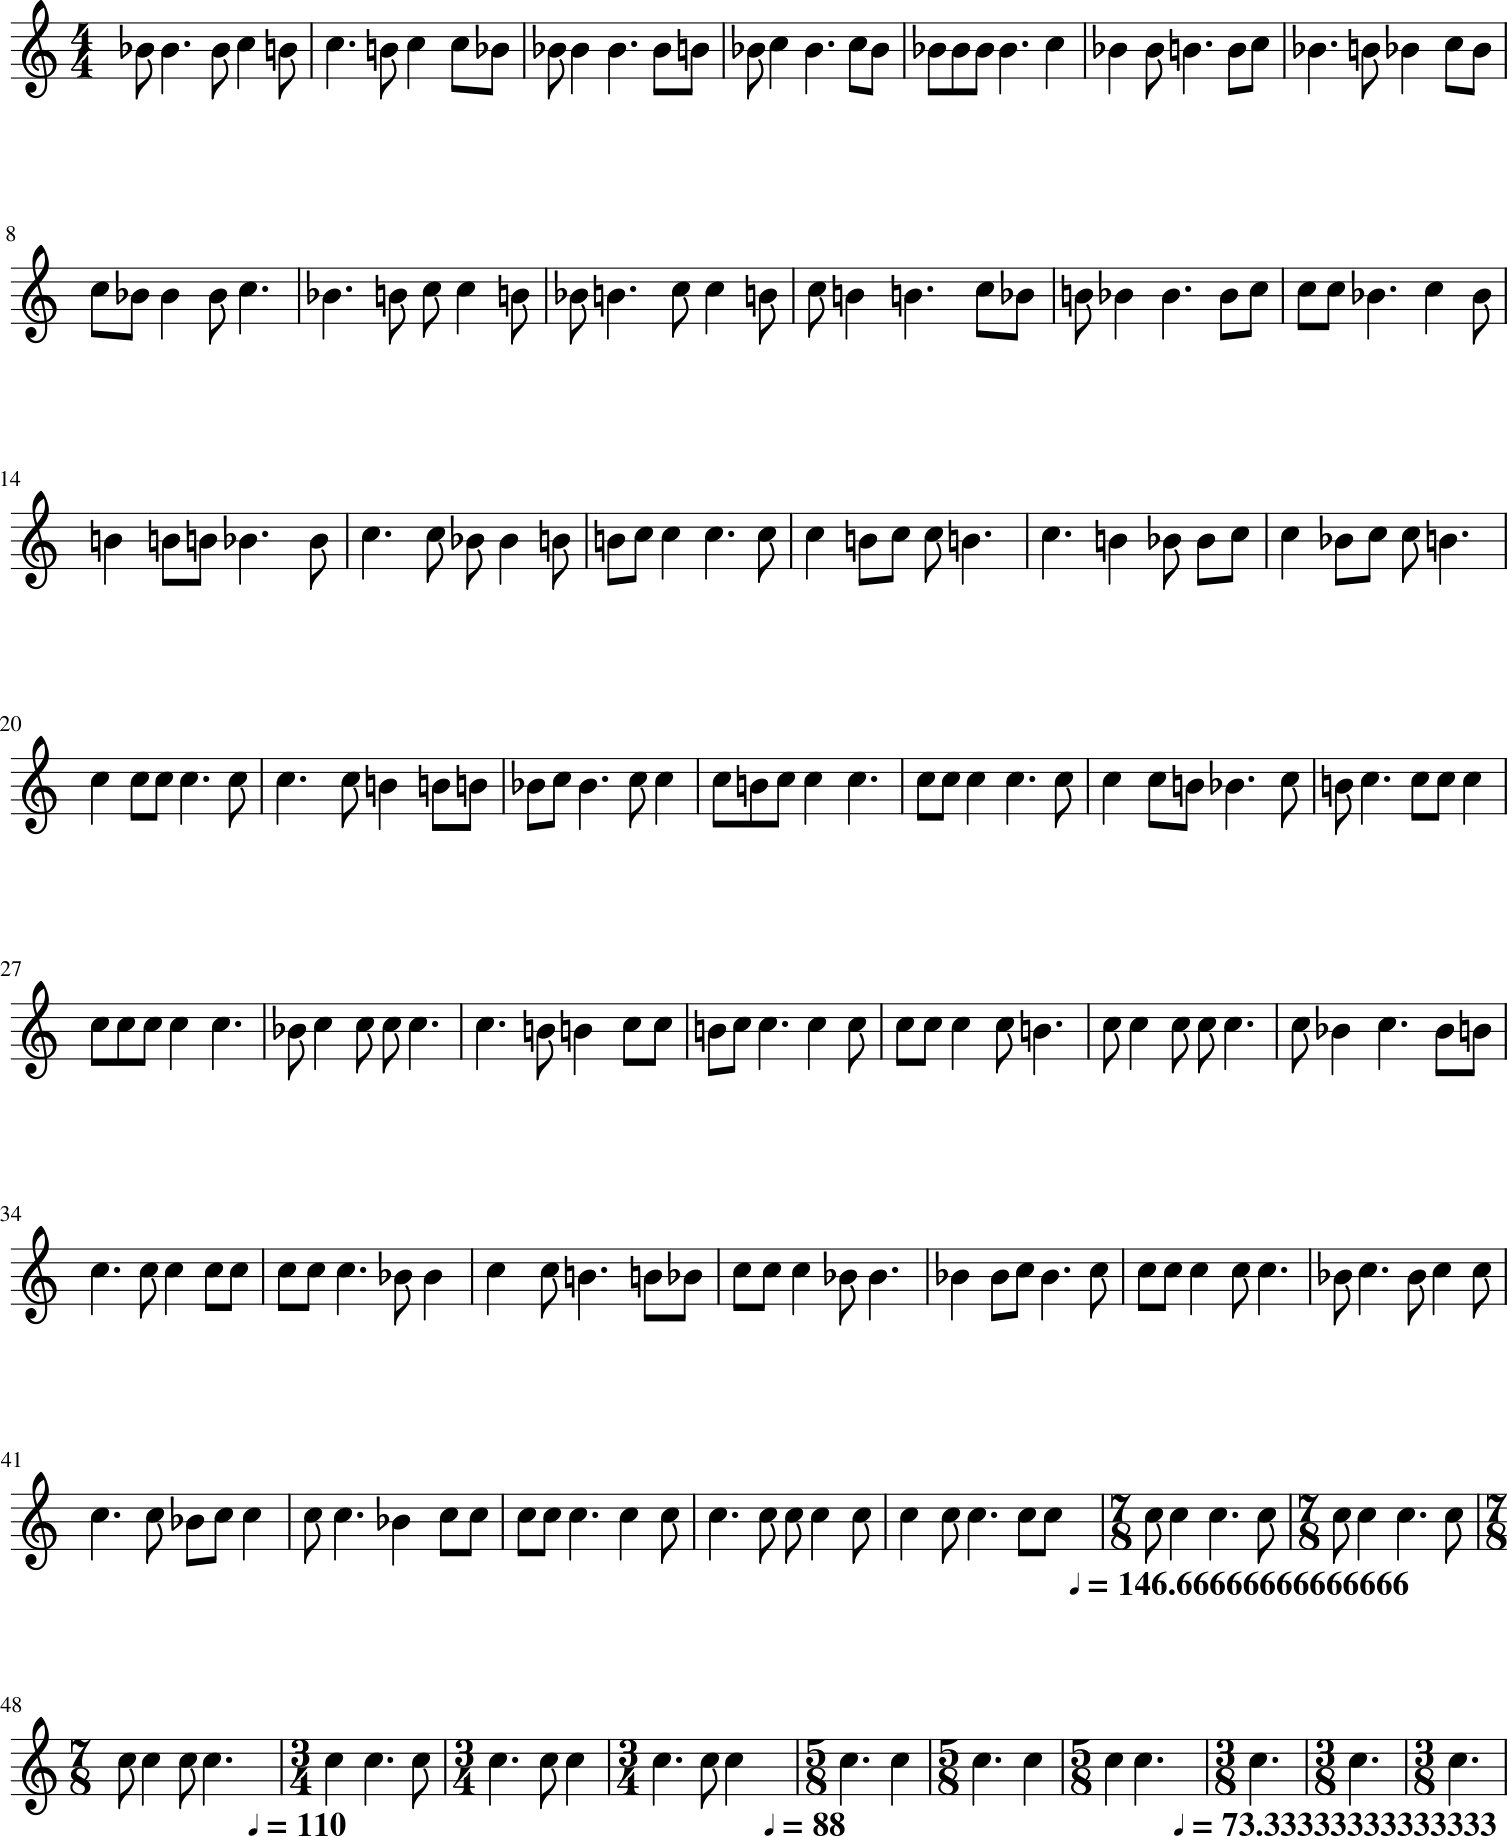

In [51]:
s.show()

In [52]:
overall_duration = float(measure_count*4*Fraction(timeSig)/bpm)
print(f'Before uncommenting the following line to listen to the audio, please note that this rendition lasts {overall_duration} minutes.')

Before uncommenting the following line to listen to the audio, please note that this rendition lasts 1.0363636363636364 minutes.


In [53]:
#play(s)

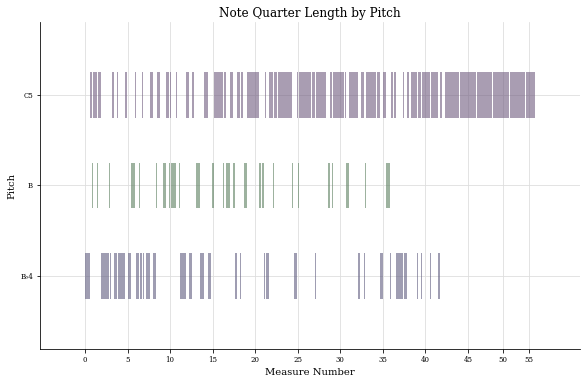

In [54]:
s.plot()

# Exercise: Mozart's Würfelspiel

Implement a reduced version of Mozart's Würfelspiel, using a coin toss instead of a dice roll (i.e., only two options for each bar). 

You find the original score here:

https://ks4.imslp.net/files/imglnks/usimg/b/bc/IMSLP20432-PMLP47543-mozart_-_dice_waltz.pdf

The notation of this piece consists of two tables and a score. Each table corresponds to one of the two parts of a menuet. Let's focus on the first part (Erster Theil) for now. The first table contains eight columns, labelled A-H, each one corresponding to one of the eight bars comprising the first part of a menuet. The numbers in each column correspond to the different options that can instantiate that bar. For example, the first bar (A) in the first part of the menuet can be instantiated by options 96, 32, 69,40 etc. Each one of these numbers points to one of the numbered bars in the score. 

Since we only need two otions for each bar (we will then toss a coin to pick!), we only need two of these numbers for each column. As a starting point, let us pick one option for the first bar: e.g., 40. We need to transcribe the content of bar 40 from Mozart's score:  

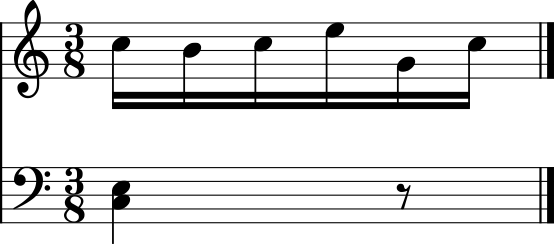

In [55]:
#What are the notes in the right hand part? For each note (or chord), we need to create a music21 object reporting pitches and durations in quarterLength units (e.g., eigth-notes are 1/2 of a quarter-note etc.)
Ar_option1 = [note.Note('C5', quarterLength = 1/4), note.Note('B4',quarterLength = 1/4), note.Note('C5',quarterLength = 1/4), note.Note('E5',quarterLength = 1/4), note.Note('G4',quarterLength = 1/4), note.Note('C5',quarterLength = 1/4)]
#What are the notes in the left hand part?
Al_option1 = [chord.Chord(['C3', 'E3'], quarterLength = 1), note.Rest(quarterLength = 1/2)]


#Create the score
Menuet = stream.Score()

#Create right-and left-hand parts, in 3/8 meter
RightHand = stream.Part()
RightHand.append(meter.TimeSignature('3/8'))
LeftHand = stream.Part()
LeftHand.append(meter.TimeSignature('3/8'))

#Insert right- and left-hand parts at the beginning of the score
Menuet.insert(0, RightHand)
Menuet.insert(0, LeftHand)

#Insert notes for the two hands in the corresponding stream.Part objects
RightHand.append(Ar_option1)
LeftHand.append(Al_option1)

Menuet.show()

Let's include now one alternative for measure A by picking another number from column A of the table. Say, 54:

In [56]:
#What are the notes in the new option for measure A?
Ar_option2 = [chord.Chord(['C5', 'E5'], quarterLength = 1/2), chord.Chord(['C5', 'E5'], quarterLength = 1/2), chord.Chord(['C5', 'E5'], quarterLength = 1/2)]
Al_option2 = [note.Note('C3', quarterLength = 1/2), note.Note('C3', quarterLength = 1/2), note.Note('C3', quarterLength = 1/2)]

Now, the first bar of the menuet can be either formed by Ar (in the right hand) and Al (in the left hand), or by Ar_new and Al_new.

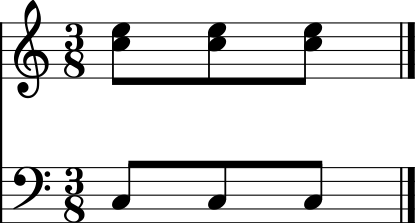

In [57]:
#Create the score
Menuet = stream.Score()

#Create right-and left-hand parts, in 3/8 meter
RightHand = stream.Part()
RightHand.append(meter.TimeSignature('3/8'))
LeftHand = stream.Part()
LeftHand.append(meter.TimeSignature('3/8'))

#Insert right- and left-hand parts at the beginning of the score
Menuet.insert(0, RightHand)
Menuet.insert(0, LeftHand)

#Possible right-hand notes
Ar = [Ar_option1, Ar_option2]

#Possible left-hand notes
Al = [Al_option1, Al_option2]

#Coin toss (randomly select 0 or 1)
flip = random.randint(0,1)

#Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss
RightHand.append(Ar[flip])
LeftHand.append(Al[flip])

Menuet.show()

Encode two options for each of the remaining bars of the menuet, and implement a coin toss for each bar. In this way, you can generate many different menuets in the style of Mozart! Try to come up with ways to simplify the coding. For example, a helper function like the following prevents us from having to type music21 Note or Chord objects every time:

In [58]:
def notes_from_list(notes):
    #Takes a list of pitches and durations and returns a list of musci21 Note or Chord objects, as appropriate
    #Each entry in the input list can either be a duration (rest), or in the form [pitchName, duration] (individual note) or [[pitchName1, pitchName2, ...], duration] (chord)
    
    output = []
    for item in notes:
        if type(item) in [int, float]: #rest
            output += [note.Rest(quarterLength = item)]
        elif type(item[0]) == str: #note
            output += [note.Note(item[0], quarterLength = item[1])]
        elif type(item[0] == list): #chord
            output += [chord.Chord(item[0], quarterLength = item[1])]
        else:
            print('Wrong input format')
    return output
    

With the help of this function, we can rewrite the above code as follows:

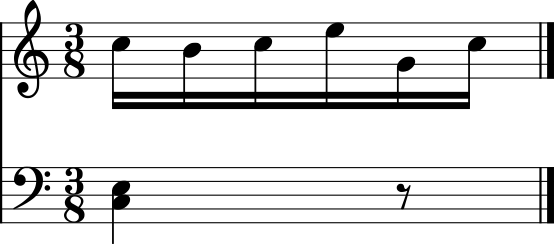

In [59]:
Ar = [[['C5', 1/4], ['B4',1/4],['C5', 1/4],['E5', 1/4], ['G4', 1/4], ['C5', 1/4]], 
    [[['C5', 'E5'], 1/2], [['C5', 'E5'],  1/2],[['C5', 'E5'], 1/2]]]
Al = [[[['C3', 'E3'], 1],  1/2],  
      [['C3', 1/2], ['C3',  1/2], ['C3', 1/2]]]

#Create the score
Menuet = stream.Score()

#Create right-and left-hand parts, in 3/8 meter
RightHand = stream.Part()
RightHand.append(meter.TimeSignature('3/8'))
LeftHand = stream.Part()
LeftHand.append(meter.TimeSignature('3/8'))

#Insert right- and left-hand parts at the beginning of the score
Menuet.insert(0, RightHand)
Menuet.insert(0, LeftHand)

#Coin toss (randomly select 0 or 1)
flip = random.randint(0,1)

#Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss
RightHand.append(notes_from_list(Ar[flip]))
LeftHand.append(notes_from_list(Al[flip]))

Menuet.show()